## Simple 1st order ODE

In [ ]:
def simple_ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    # Most backends
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)

    return [dy1_x - y2, dy2_x + y1]


# Boundary conditions
def boundary(_, on_initial):
    return on_initial               # on_initial: True for initial condition


def func(x):            # The reference solution - either analytical or numerical with scipy.integrate.solve_ivp
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


# Create a time domain geometry
geom = dde.geometry.TimeDomain(0, 10)

# Define the initial conditions
ic1 = dde.icbc.IC(geom, lambda x: 0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: 1, boundary, component=1)

# Create a PDE problem object
data = dde.data.PDE(geom, simple_ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)    

layer_size = [1] + [50] * 5 + [2]                           # Neural network topology
activation = "tanh"                                         # Activation function
initializer = "Glorot uniform"                              # Initializer for the weights
net = dde.nn.FNN(layer_size, activation, initializer)       # Create the neural network

# Create a Model using the PDE and neural network definitions
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Lotka-Volterra model

Using backend: tensorflow.compat.v1

2022-07-28 07:09:49.562989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-28 07:09:49.563027: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


2022-07-28 07:10:04.817829: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-28 07:10:04.817869: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-28 07:10:04.817896: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-baf76a): /proc/driver/nvidia/version does not exist



Compiling model...
Building feed-forward neural network...


/opt/python/3.10.4/lib/python3.10/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+3002=3002. 
  warnings.warn("The balance properties of Sobol' points require "
/opt/python/3.10.4/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 0.175106 s



2022-07-28 07:10:12.227193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 1.417520 s

Initializing variables...


2022-07-28 07:10:13.559137: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Training model...

Step      Train loss              Test loss               Test metric
0         [6.35e+01, 2.55e+01]    [6.35e+01, 2.55e+01]    []  
1000      [5.02e+00, 5.17e-01]    [5.02e+00, 5.16e-01]    []  
2000      [3.12e+00, 4.89e-01]    [3.10e+00, 4.88e-01]    []  
3000      [2.22e+00, 6.03e-01]    [2.20e+00, 6.01e-01]    []  
4000      [1.61e+00, 6.92e-01]    [1.59e+00, 6.88e-01]    []  
5000      [1.12e+00, 6.63e-01]    [1.10e+00, 6.58e-01]    []  
6000      [8.50e-01, 4.35e-01]    [8.39e-01, 4.31e-01]    []  
7000      [4.92e-01, 2.41e-01]    [4.86e-01, 2.39e-01]    []  
8000      [2.99e-01, 1.37e-01]    [2.95e-01, 1.35e-01]    []  
9000      [1.96e-01, 9.54e-02]    [1.93e-01, 9.39e-02]    []  
10000     [1.29e-01, 6.17e-02]    [1.27e-01, 6.07e-02]    []  
11000     [8.98e-02, 4.90e-02]    [8.89e-02, 4.82e-02]    []  
12000     [4.95e-01, 4.95e-02]    [4.94e-01, 4.88e-02]    []  
13000     [9.91e-02, 2.83e-02]    [9.88e-02, 2.78e-02]    []  
14000     [1.36e-01, 2.33e-02

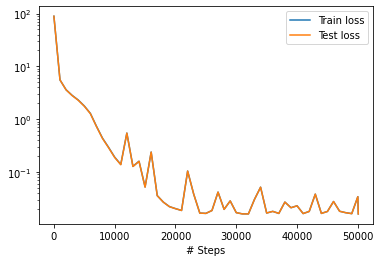

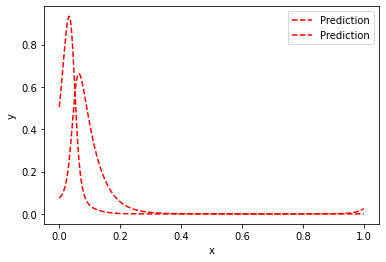

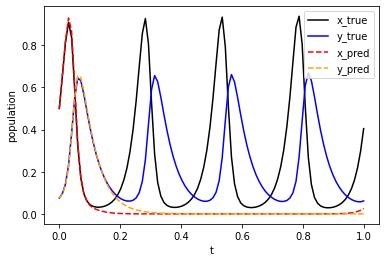

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch

ub = 200
rb = 20


def func(t, r):
    x, y = r
    dx_t = 1 / ub * rb * (2.0 * ub * x - 0.04 * ub * x * ub * y)
    dy_t = 1 / ub * rb * (0.02 * ub * x * ub * y - 1.06 * ub * y)
    return dx_t, dy_t


def gen_truedata():
    t = np.linspace(0, 1, 100)

    sol = integrate.solve_ivp(func, (0, 10), (100 / ub, 15 / ub), t_eval=t)
    x_true, y_true = sol.y
    x_true = x_true.reshape(100, 1)
    y_true = y_true.reshape(100, 1)

    return x_true, y_true


def ode_system(x, y):
    r = y[:, 0:1]
    p = y[:, 1:2]
    dr_t = dde.grad.jacobian(y, x, i=0)
    dp_t = dde.grad.jacobian(y, x, i=1)
    return [
        dr_t - 1 / ub * rb * (2.0 * ub * r - 0.04 * ub * r * ub * p),
        dp_t - 1 / ub * rb * (0.02 * r * ub * p * ub - 1.06 * p * ub),
    ]


geom = dde.geometry.TimeDomain(0.0, 1.0)
data = dde.data.PDE(geom, ode_system, [], 3000, 2, num_test=3000)

layer_size = [1] + [64] * 6 + [2]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

# Backend tensorflow.compat.v1 or tensorflow
def input_transform(t):
    return tf.concat(
        (
            t,
            tf.sin(t),
            tf.sin(2 * t),
            tf.sin(3 * t),
            tf.sin(4 * t),
            tf.sin(5 * t),
            tf.sin(6 * t),
        ),
        axis=1,
    )
# Backend pytorch
# def input_transform(t):
#     return torch.cat(
#         [
#             torch.sin(t),
#         ],
#         dim=1,
#     )

# hard constraints: x(0) = 100, y(0) = 15
# Backend tensorflow.compat.v1 or tensorflow
def output_transform(t, y):
    y1 = y[:, 0:1]
    y2 = y[:, 1:2]
    return tf.concat([y1 * tf.tanh(t) + 100 / ub, y2 * tf.tanh(t) + 15 / ub], axis=1)
# Backend pytorch
# def output_transform(t, y):
#     y1 = y[:, 0:1]
#     y2 = y[:, 1:2]
#     return torch.cat([y1 * torch.tanh(t) + 100 / ub, y2 * torch.tanh(t) + 15 / ub], dim=1)

net.apply_feature_transform(input_transform)
net.apply_output_transform(output_transform)
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

plt.xlabel("t")
plt.ylabel("population")

t = np.linspace(0, 1, 100)
x_true, y_true = gen_truedata()
plt.plot(t, x_true, color="black", label="x_true")
plt.plot(t, y_true, color="blue", label="y_true")

t = t.reshape(100, 1)
sol_pred = model.predict(t)
x_pred = sol_pred[:, 0:1]
y_pred = sol_pred[:, 1:2]

plt.plot(t, x_pred, color="red", linestyle="dashed", label="x_pred")
plt.plot(t, y_pred, color="orange", linestyle="dashed", label="y_pred")
plt.legend()
plt.show()